### Code and Resources Used
Python Version: 3.10.3\
Dataset Train : Churn_train.csv\
Dataset Test  : Churn_test.csv

CLIENTNUM is unique customer number and Churn_Flag is the target

## Load Dataset

In [1]:
import pandas as pd

dataset = pd.read_csv('Churn_train.csv')
dataset.head(10)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag
0,772382283,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,...,3,2302.0,1593,709.0,0.671,2689,49,0.324,0.692,1
1,709206333,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,...,4,4333.0,0,4333.0,0.463,1558,40,0.538,0.000,1
2,714887808,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,...,2,1818.0,0,1818.0,0.758,2279,50,0.724,0.000,1
3,709531908,53,M,3,High School,Married,$60K - $80K,Blue,47,5,...,2,1438.3,0,1438.3,0.776,2184,53,0.828,0.000,0
4,739692933,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,...,4,3126.0,2517,609.0,1.235,1638,41,0.519,0.805,0
5,719990358,36,F,3,High School,Married,Less than $40K,Blue,28,3,...,1,1967.0,0,1967.0,0.730,4620,77,0.878,0.000,0
6,717340608,51,F,3,High School,Single,Unknown,Gold,39,1,...,2,34516.0,1873,32643.0,0.629,7703,104,0.677,0.054,0
7,715624533,41,F,3,Unknown,Unknown,$40K - $60K,Blue,30,1,...,3,5357.0,1272,4085.0,0.708,7730,97,0.540,0.237,0
8,715205358,39,M,1,Graduate,Married,$60K - $80K,Blue,31,4,...,1,2536.0,913,1623.0,1.059,1750,35,1.333,0.360,0
9,711835758,50,M,3,Graduate,Married,$120K +,Blue,42,4,...,3,34516.0,2099,32417.0,0.449,1756,35,0.250,0.061,0


## A. Data Pre-Processing

### Check Data Type and Missing Value

In [2]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9114 entries, 0 to 9113
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 9114 non-null   int64  
 1   Customer_Age              9114 non-null   int64  
 2   Gender                    9114 non-null   object 
 3   Dependent_count           9114 non-null   int64  
 4   Education_Level           9114 non-null   object 
 5   Marital_Status            9114 non-null   object 
 6   Income_Category           9114 non-null   object 
 7   Card_Category             9114 non-null   object 
 8   Months_on_book            9114 non-null   int64  
 9   Total_Relationship_Count  9114 non-null   int64  
 10  Months_Inactive_12_mon    9114 non-null   int64  
 11  Contacts_Count_12_mon     9114 non-null   int64  
 12  Credit_Limit              9114 non-null   float64
 13  Total_Revolving_Bal       9114 non-null   int64  
 14  Avg_Open

None

The data type looks good and the number of rows for each column is the same, 9114 entries. However, to be sure, let's use the function to search for null or missing values

In [3]:
display(dataset.isna().sum())

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Churn_Flag                  0
dtype: int64

All row of every column looks good right now, we dont have any missing values, looks suspicious. But lets see are we have any outlier or imbalanced data?

Here our table :

No.  |Column|Entries|Dtype  
-----|------|------|----
 0|CLIENTNUM|9114|int64  
 1|Customer_Age|9114|int64  
 2|Gender|9114|object 
 3|Dependent_count|9114|int64  
 4|Education_Level|9114|object 
 5|Marital_Status|9114|object 
 6|Income_Category|9114|object 
 7|Card_Category|9114|object 
 8|Months_on_book|9114|int64  
 9|Total_Relationship_Count|9114|int64  
 10|Months_Inactive_12_mon|9114|int64  
 11|Contacts_Count_12_mon|9114|int64  
 12|Credit_Limit|9114|float64
 13|Total_Revolving_Bal|9114|int64  
 14|Avg_Open_To_Buy|9114|float64
 15|Total_Amt_Chng_Q4_Q1|9114|float64
 16|Total_Trans_Amt|9114|int64  
 17|Total_Trans_Ct|9114|int64  
 18|Total_Ct_Chng_Q4_Q1|9114|float64
 19|Avg_Utilization_Ratio|9114|float64
 20|Churn_Flag|9114|int64

 to check any outlayers and imbalance of data, we need to perform some Feature Engineering to our feature that have non numerical data type

 No.  |Column|Entries|Dtype  
-----|------|------|----
 1|Gender|9114|object 
 2|Education_Level|9114|object 
 3|Marital_Status|9114|object 
 4|Income_Category|9114|object 
 5|Card_Category|9114|object 

### Feature Engineering

We will start from Gender

In [4]:
Gender = dataset.Gender.unique()
print(Gender)

['F' 'M']


Here we get 2 unique value for gender, F for Female and M for Male. Lets change this value from object to number using labelencoder.

We need to doing this because computer only understand number. So we need to interpreting the object into a unique number so that later we can return the unique number to the object as before (reversible)

In [5]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
dataset['Gender - FE'] = le_gender.fit_transform(dataset['Gender'])
display(le_gender.classes_)
dataset.head()

array(['F', 'M'], dtype=object)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag,Gender - FE
0,772382283,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,...,2302.0,1593,709.0,0.671,2689,49,0.324,0.692,1,0
1,709206333,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,...,4333.0,0,4333.0,0.463,1558,40,0.538,0.000,1,0
2,714887808,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,...,1818.0,0,1818.0,0.758,2279,50,0.724,0.000,1,0
3,709531908,53,M,3,High School,Married,$60K - $80K,Blue,47,5,...,1438.3,0,1438.3,0.776,2184,53,0.828,0.000,0,1
4,739692933,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,...,3126.0,2517,609.0,1.235,1638,41,0.519,0.805,0,0


0 for Female and 1 for Male

Lets check on other columns

In [6]:
FE = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for i in range(len(FE)):
  print(FE[i]+' :')
  print(dataset[FE[i]].unique())
  print('')

Education_Level :
['Graduate' 'Uneducated' 'High School' 'Unknown' 'Doctorate' 'College'
 'Post-Graduate']

Marital_Status :
['Married' 'Single' 'Unknown' 'Divorced']

Income_Category :
['Less than $40K' '$40K - $60K' '$60K - $80K' 'Unknown' '$120K +'
 '$80K - $120K']

Card_Category :
['Blue' 'Gold' 'Silver' 'Platinum']



As we can see, on Education_Level, Marital_Status, and Income_Category. here we have 'Unknown' categorical value.
Maybe we need to check this for make sure. But, lets do labelencoder for Card_Category first

In [7]:
le_card_category = LabelEncoder()
dataset['Card_Category - FE'] = le_card_category.fit_transform(dataset['Card_Category'])
display(le_card_category.classes_)
dataset.head()

array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag,Gender - FE,Card_Category - FE
0,772382283,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,...,1593,709.0,0.671,2689,49,0.324,0.692,1,0,0
1,709206333,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,...,0,4333.0,0.463,1558,40,0.538,0.000,1,0,0
2,714887808,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,...,0,1818.0,0.758,2279,50,0.724,0.000,1,0,0
3,709531908,53,M,3,High School,Married,$60K - $80K,Blue,47,5,...,0,1438.3,0.776,2184,53,0.828,0.000,0,1,0
4,739692933,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,...,2517,609.0,1.235,1638,41,0.519,0.805,0,0,0


Next, We need to count the number of values ​​from each column that has the value 'unknown'

In [8]:
UN = ['Education_Level', 'Marital_Status', 'Income_Category']

for i in range(len(UN)):
  print(UN[i]+' :')
  preview = pd.DataFrame([
          dataset[UN[i]].value_counts(),
          round(dataset[UN[i]].value_counts(1) * 100, 2)], ).T
  display(preview)
  print('')

Education_Level :


,count,proportion
Education_Level,,
Graduate,2832.0,31.07
High School,1816.0,19.93
Unknown,1389.0,15.24
Uneducated,1328.0,14.57
College,885.0,9.71
Post-Graduate,463.0,5.08
Doctorate,401.0,4.40



Marital_Status :


,count,proportion
Marital_Status,,
Married,4231.0,46.42
Single,3545.0,38.90
Unknown,674.0,7.40
Divorced,664.0,7.29



Income_Category :


,count,proportion
Income_Category,,
Less than $40K,3211.0,35.23
$40K - $60K,1608.0,17.64
$80K - $120K,1408.0,15.45
$60K - $80K,1250.0,13.72
Unknown,989.0,10.85
$120K +,648.0,7.11


Here we got the 'unknown' values for every column have quite large of count and percentages for all unique value at same column. For now maybe we can ignore it. But, if in the machine learning we get bad result maybe we need to check this value.

In [9]:
all_unknown = dataset[(dataset['Education_Level']== 'Unknown')&(dataset['Marital_Status']== 'Unknown')&(dataset['Income_Category']== 'Unknown')]
all_unknown

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag,Gender - FE,Card_Category - FE
887,719329983,42,F,3,Unknown,Unknown,Unknown,Blue,36,6,...,0,15648.0,0.731,13784,88,0.913,0.000,0,0,0
1143,755959683,50,F,5,Unknown,Unknown,Unknown,Blue,43,5,...,2281,1129.0,0.518,1296,31,0.348,0.669,0,0,0
2607,709375158,29,F,1,Unknown,Unknown,Unknown,Blue,36,6,...,1835,5435.0,0.860,3759,69,0.917,0.252,0,0,0
6049,769701258,26,F,0,Unknown,Unknown,Unknown,Blue,18,3,...,1319,11144.0,0.655,3996,71,0.543,0.106,0,0,0
6735,712019883,43,F,4,Unknown,Unknown,Unknown,Blue,34,5,...,1528,11250.0,0.777,3337,69,0.769,0.120,0,0,0
8293,714127383,48,F,3,Unknown,Unknown,Unknown,Blue,36,3,...,2517,1914.0,0.499,2185,48,0.371,0.568,1,0,0


Now we need to do feature enginnering for this 3 columns same as before

In [10]:
le_education_level = LabelEncoder()
le_marital_status = LabelEncoder()
le_income_category = LabelEncoder()

dataset['Education_Level - FE'] = le_education_level.fit_transform(dataset['Education_Level'])
dataset['Marital_Status - FE'] = le_marital_status.fit_transform(dataset['Marital_Status'])
dataset['Income_Category - FE'] = le_income_category.fit_transform(dataset['Income_Category'])

display(le_card_category.classes_)
display(le_marital_status.classes_)
display(le_income_category.classes_)

dataset.head()

array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object)

array(['Divorced', 'Married', 'Single', 'Unknown'], dtype=object)

array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown'], dtype=object)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag,Gender - FE,Card_Category - FE,Education_Level - FE,Marital_Status - FE,Income_Category - FE
0,772382283,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,...,2689,49,0.324,0.692,1,0,0,2,1,4
1,709206333,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,...,1558,40,0.538,0.000,1,0,0,2,2,1
2,714887808,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,...,2279,50,0.724,0.000,1,0,0,5,2,4
3,709531908,53,M,3,High School,Married,$60K - $80K,Blue,47,5,...,2184,53,0.828,0.000,0,1,0,3,1,2
4,739692933,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,...,1638,41,0.519,0.805,0,0,0,6,2,1


Now our dataset ready to explore more deeply. But, first we need to remove CLIENTNUM columns because is unique customer number

In [11]:
dataset_ready = dataset.drop(['CLIENTNUM'],axis=1)
dataset_ready.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag,Gender - FE,Card_Category - FE,Education_Level - FE,Marital_Status - FE,Income_Category - FE
0,46,F,3,Graduate,Married,Less than $40K,Blue,36,3,3,...,2689,49,0.324,0.692,1,0,0,2,1,4
1,44,F,4,Graduate,Single,$40K - $60K,Blue,30,3,4,...,1558,40,0.538,0.000,1,0,0,2,2,1
2,43,F,1,Uneducated,Single,Less than $40K,Blue,36,1,3,...,2279,50,0.724,0.000,1,0,0,5,2,4
3,53,M,3,High School,Married,$60K - $80K,Blue,47,5,2,...,2184,53,0.828,0.000,0,1,0,3,1,2
4,46,F,2,Unknown,Single,$40K - $60K,Blue,29,4,2,...,1638,41,0.519,0.805,0,0,0,6,2,1


## B. Training classification ML

<Axes: >

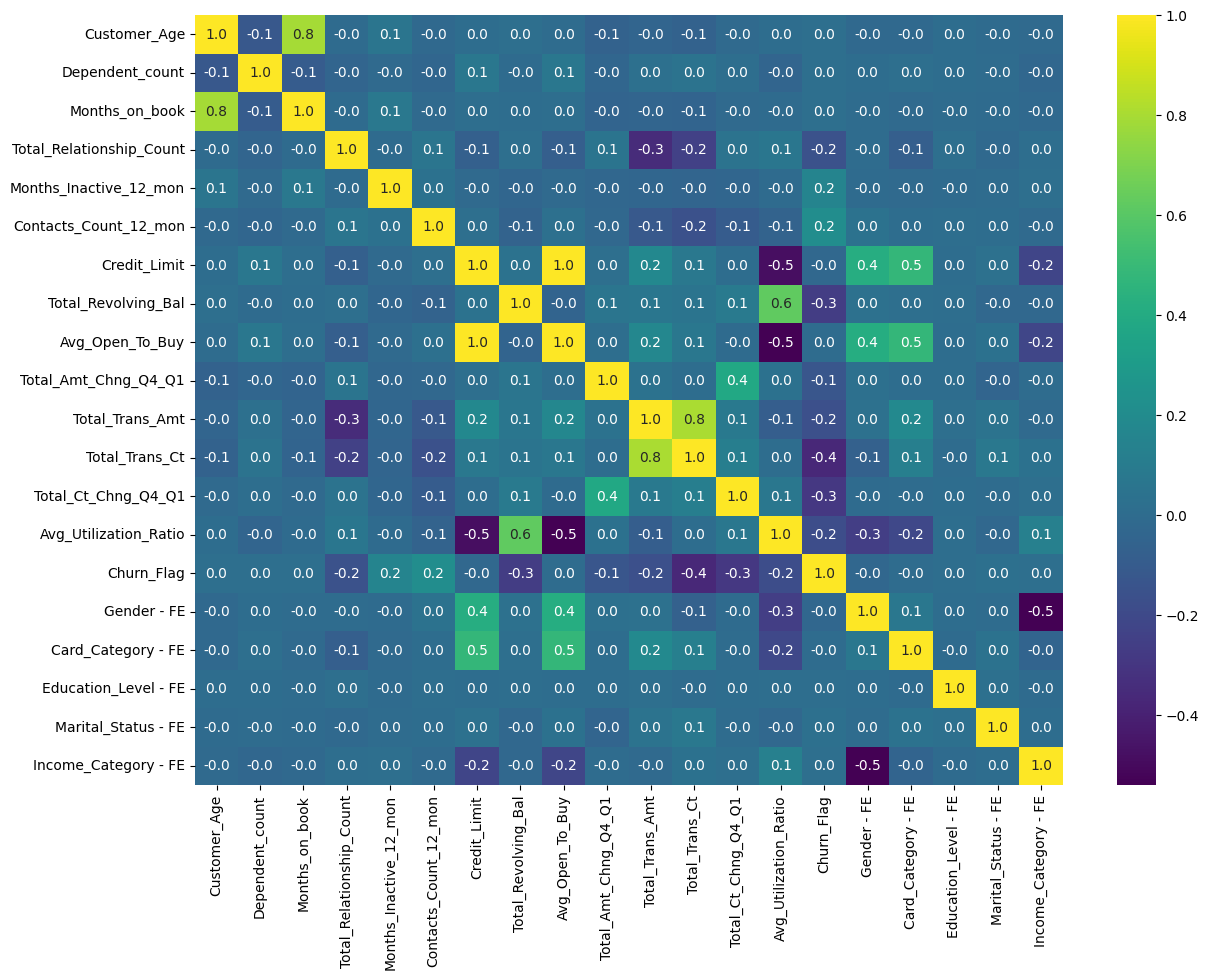

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 10))
sns.heatmap(dataset_ready.corr(numeric_only=True),annot=True,fmt=".1f",cmap='viridis')

From correlation value, we can see on 'Churn_Flag' (our target) mostly have negative corelation with other column, specialy with column 'Total_Trans_Ct'. But for now we will store all columns as feature (X) with 'Churn_Flag' as target (y) and split it for training and test

In [13]:
from sklearn.model_selection import train_test_split

X = dataset_ready.drop(columns=['Churn_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'])
y = dataset_ready['Churn_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We need to know does our target balance or not. To know that, first we count every values on Churn_Flag.

Bacause Churn_Flag is binary, 1 for Churn dan 0 for not. So, we need to count how many count for 1 and 0.

In [14]:
y_train.value_counts()

Churn_Flag
0    6137
1    1154
Name: count, dtype: int64

Our target is inbalance. we need to fix that before create model with create synthesises data with SMOTE (Synthetic Minority Oversampling Technique) because our data is tabular. This method not always give as best result but sometime it can be help

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

X_fixed, y_fixed = smote.fit_resample(X_train,y_train)
y_fixed.value_counts()

Churn_Flag
0    6137
1    6137
Name: count, dtype: int64

### Training Model

For model selection, we can use some package namely lazypredict. This package is like GridsearchCV from sklearn but in instant

In [16]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_fixed, X_test, y_fixed, y_test)

 97%|█████████▋| 28/29 [00:36<00:01,  1.11s/it]

[LightGBM] [Info] Number of positive: 6137, number of negative: 6137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2056
[LightGBM] [Info] Number of data points in the train set: 12274, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:36<00:00,  1.27s/it]


In [17]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.97               0.95     0.95      0.97   
LGBMClassifier                     0.96               0.94     0.94      0.97   
RandomForestClassifier             0.96               0.93     0.93      0.96   
AdaBoostClassifier                 0.93               0.92     0.92      0.93   
BaggingClassifier                  0.95               0.91     0.91      0.95   
DecisionTreeClassifier             0.92               0.87     0.87      0.92   
ExtraTreesClassifier               0.94               0.87     0.87      0.94   
SVC                                0.91               0.86     0.86      0.91   
KNeighborsClassifier               0.86               0.83     0.83      0.87   
CalibratedClassifierCV             0.84               0.82     0.82      0.86   
LogisticRegression          

from the result we got 
1. XGBClassifier
2. LGBMClassifier
3. RandomForestClassifier

we will use XGBClassifier or GradientBoostingClassifier

In [164]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42)) #n_jobs=-1 for using all core on Processor
clf.fit(X_fixed,y_fixed)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

## C. Evaluate Model Performance

Accuracy:  94.89851892484916 %
Precision:  0.8957268828192742
Recall:  0.935923075283031
confusion matrix: 


<Axes: >

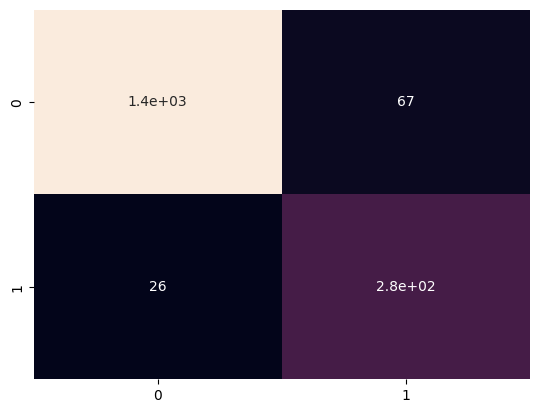

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_predict = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test,y_predict)*100,'%')
print('Precision: ', precision_score(y_test,y_predict,average = 'macro'))
print('Recall: ', recall_score(y_test,y_predict,average = 'macro'))
print('confusion matrix: ')
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cbar=False)

### Explanation of Result:

from our first shoot model we archive Accuracy score greater than 94% which means it is pretty good for first try without changing any variable on the model. However, we also need to see that the Precision and Recall values to confirm whether the performance of machine learning is good.

1. Precision\
In this case, the precision value obtained is 0.89. This means that of all the predictions made by the model that are classified as not Churn, about 89% of the predictions are actually not Churn, while the rest are mispredictions that should be Churn.

2. Recall\
In this case, the recall value is 0.93. This means that the model can identify about 93% of all entries that are actually not Churn. In other words, the model has a good ability to detect not Churn entries.

In terms of accuracy, precision and recall, we can conclude that the performance of the model created is very good. With little fine tunning, this model can be more great.

## D. Create Prediction Using From ‘churn_test’ Data

### Import Data test 

In [168]:
test = pd.read_csv('Churn_test.csv')
test = test.drop('CLIENTNUM',axis=1)
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,48,F,3,Post-Graduate,Married,Unknown,Blue,36,3,1,3,20631.00,2048,18583.00,0.68,4827,77,0.71,0.10
1,52,F,5,Unknown,Married,Less than $40K,Blue,36,4,3,3,9611.00,0,9611.00,0.84,7636,64,0.83,0.00
2,45,M,4,Unknown,Married,$120K +,Blue,31,1,4,3,26107.00,0,26107.00,0.55,1697,47,0.42,0.00
3,52,M,4,High School,Married,$60K - $80K,Blue,44,6,3,4,4153.00,0,4153.00,0.43,1771,41,0.37,0.00
4,40,M,3,Post-Graduate,Married,$120K +,Blue,36,4,2,4,7464.00,2517,4947.00,0.90,4348,62,0.88,0.34


### Perform Label Encoder same as before (transform)

In [182]:
test['Gender - FE'] = le_gender.transform(test['Gender'])
test['Card_Category - FE'] = le_card_category.transform(test['Card_Category'])
test['Education_Level - FE'] = le_education_level.transform(test['Education_Level'])
test['Marital_Status - FE'] = le_marital_status.transform(test['Marital_Status'])
test['Income_Category - FE'] = le_income_category.transform(test['Income_Category'])

test_ready = test.drop(columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'])
test_ready.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender - FE,Card_Category - FE,Education_Level - FE,Marital_Status - FE,Income_Category - FE
0,48,3,36,3,1,3,20631.00,2048,18583.00,0.68,4827,77,0.71,0.10,0,0,4,1,5
1,52,5,36,4,3,3,9611.00,0,9611.00,0.84,7636,64,0.83,0.00,0,0,6,1,4
2,45,4,31,1,4,3,26107.00,0,26107.00,0.55,1697,47,0.42,0.00,1,0,6,1,0
3,52,4,44,6,3,4,4153.00,0,4153.00,0.43,1771,41,0.37,0.00,1,0,3,1,2
4,40,3,36,4,2,4,7464.00,2517,4947.00,0.90,4348,62,0.88,0.34,1,0,4,1,0


### Predict target Churn_Flag

In [194]:
test_predict = clf.predict(test_ready)

test_result = test_ready.copy()
test_result['Churn_Flag'] = test_predict
test_result.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender - FE,Card_Category - FE,Education_Level - FE,Marital_Status - FE,Income_Category - FE,Churn_Flag
0,48,3,36,3,1,3,20631.00,2048,18583.00,0.68,4827,77,0.71,0.10,0,0,4,1,5,0
1,52,5,36,4,3,3,9611.00,0,9611.00,0.84,7636,64,0.83,0.00,0,0,6,1,4,1
2,45,4,31,1,4,3,26107.00,0,26107.00,0.55,1697,47,0.42,0.00,1,0,6,1,0,1
3,52,4,44,6,3,4,4153.00,0,4153.00,0.43,1771,41,0.37,0.00,1,0,3,1,2,1
4,40,3,36,4,2,4,7464.00,2517,4947.00,0.90,4348,62,0.88,0.34,1,0,4,1,0,0


### Save churn_test prediction as .csv

In [195]:
test_result.to_csv('churn_test prediction.csv')